
Importing Libraries:

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


Reading and Checking Data of Stock Dataset:

In [3]:

data = pd.read_csv("TCS.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-17,1800.000000,1851.949951,1753.000000,1806.199951,1785.848389,9895823.0
1,2020-04-20,1830.000000,1830.000000,1802.500000,1818.650024,1798.158325,3244282.0
2,2020-04-21,1765.000000,1794.599976,1727.699951,1737.650024,1718.070923,5122541.0
3,2020-04-22,1737.650024,1790.000000,1719.150024,1769.500000,1749.561890,3829836.0
4,2020-04-23,1780.000000,1900.000000,1760.849976,1878.250000,1857.086548,5934366.0


In [4]:
data.shape

(251, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [6]:
data.nunique()

Date         251
Open         233
High         242
Low          245
Close        249
Adj Close    249
Volume       250
dtype: int64

In [7]:
list_columns = data.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:

data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2577.022199,2608.927994,2546.355009,2576.949802,2567.087775,3.979173e+06
std,449.488397,451.440389,443.563430,447.158056,454.362318,2.122966e+06
min,1737.650024,1790.000000,1719.150024,1737.650024,1718.070923,1.165882e+06
25%,2216.250000,2244.612488,2190.862549,2219.174926,2200.619690,2.778515e+06
50%,2652.500000,2675.175049,2615.800049,2643.250000,2638.229492,3.439884e+06
75%,2998.712463,3046.312500,2968.337463,3006.799988,3006.799988,4.383744e+06
max,3354.000000,3354.350098,3308.000000,3322.250000,3322.250000,1.983933e+07



Heatmap using Statistical Information of the dataframe:

Text(0.5, 1.0, 'Heatmap')

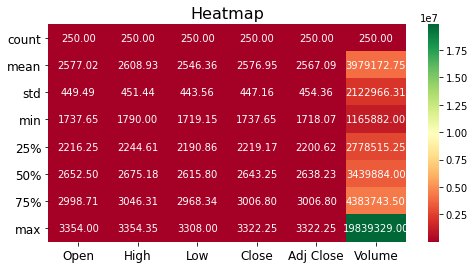

In [9]:

plt.figure(figsize=(8,4))
sns.heatmap(data.describe(), annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap", fontsize = 16)

In [10]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


History of trading open price:

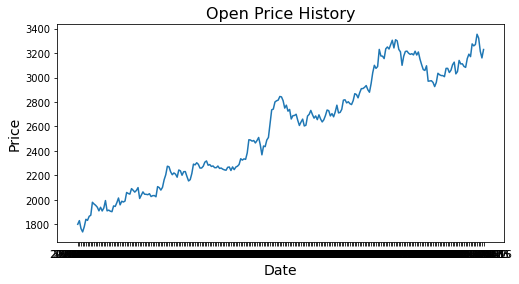

In [14]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of trading close price:

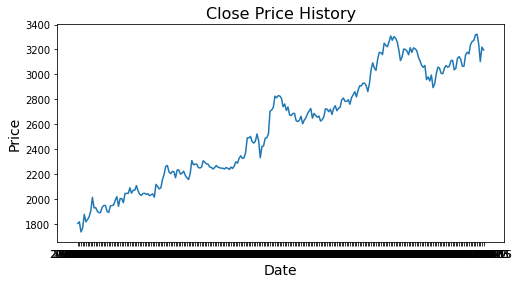

In [16]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price growth:

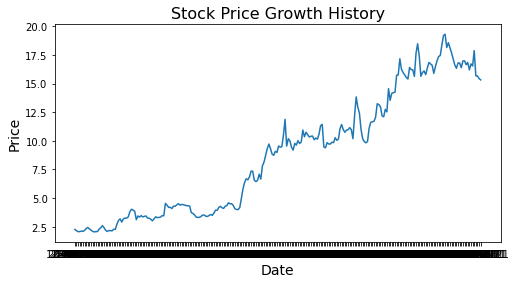

In [ ]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of low stock price:

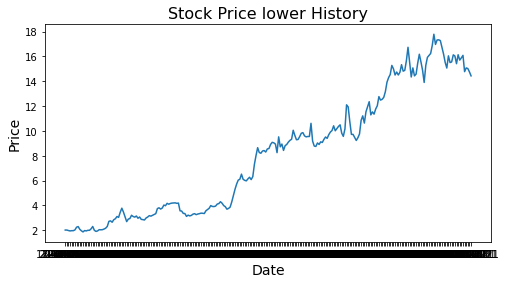

In [ ]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of adjusted close stock price:

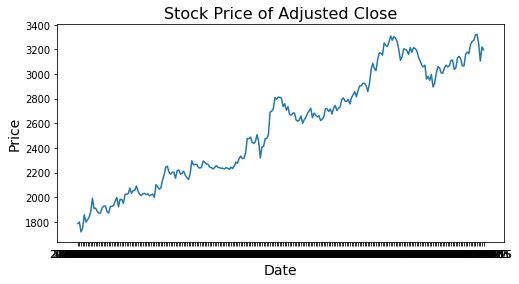

In [17]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Adj Close'])
plt.title("Stock Price of Adjusted Close", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price volume:

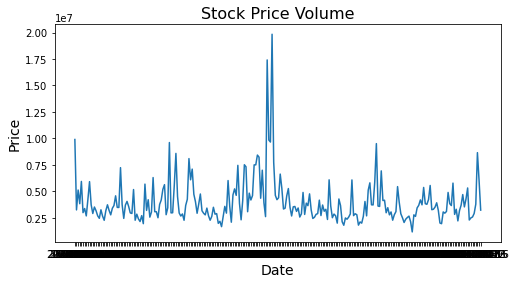

In [18]:

plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Stock market volume price Prediction:

Assigning values for x and y:

In [19]:
x = data.iloc[:, 1:7].values
y = data.iloc[:, -1].values


Splitting the dataset using train_test_split:

In [20]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


Standard Scale transform:

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Random Forest Regression model training on the Training set:

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained



The Random Forest Regression model trained

In [24]:
y_pred = regressor.predict(x_test)
y_pred

array([ 1884683.5,  8610061.1,  3591183.3,  3591464.1,  3313569.1,
        1850977.7,  5342279. ,  2259096.8,  4615512. ,  2359839.4,
        5521181.2,  3673191.3,  4186066.8,  3610076.9,  3928663.6,
        4693062.2,  2359839.4,  2881175.2,  3705399.2,  2093522.2,
        5972969.2,  4191455.5,  3696078.8,  7377341.3,  4166452.3,
        1940490.4,  4227538.3,  5719531.3,  3050091.1,  2273818.3,
        2507842.2,  3793706.2,  7358005.2,  2785338. ,  2506892.4,
        3104365.4,  4637798.3,  2984306.9,  2772923.3,  6502451.9,
       14681655.5,  3490286.1,  4740071.2,  1884683.5,  2157748.3,
        4629407.6,  4283208.5,  3211477.6,  2955869. ,  2685937.9,
        5934813.4,  2694002.3,  5282441.6,  2934066.2,  2967527.3,
        3869200.2,  4751065.3,  2269331.9,  8419614.9,  2431898.4,
        4248856.8,  4039263.5,  2676539.1,  2931709.6,  5854335.4,
        3086076.4,  3569161.5,  1990176.3,  4346736. ,  1884683.5,
        4283208.5,  3445513.1,  5990811.6,  3240222.4,  243532


Visualizing the Train Result:

In [25]:
df = pd.DataFrame()
df

""


In [27]:
Pred_x_train = regressor.predict(x_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0      4605286.6
1      5317862.0
2      3923668.6
3      2138815.4
4      3168013.3
         ...    
161    2259096.8
162    3450801.7
163    2619671.7
164    3044915.7
165    2882454.5
Name: predict_train, Length: 166, dtype: float64

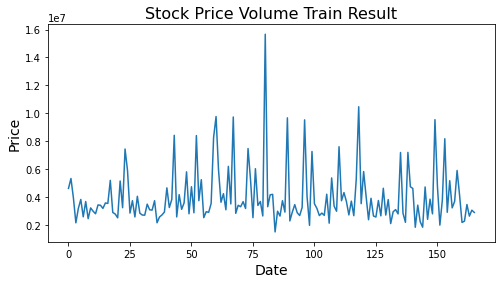

In [28]:
plt.figure(figsize=(8,4))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Visualizing the Test Result:

In [29]:
df1 = pd.DataFrame()
df1

""


In [30]:
df1['predict'] = y_pred
df1['predict']

0     1884683.5
1     8610061.1
2     3591183.3
3     3591464.1
4     3313569.1
        ...    
79    5420402.2
80    4181208.1
81    3743645.3
82    2855781.4
83    3477450.3
Name: predict, Length: 84, dtype: float64

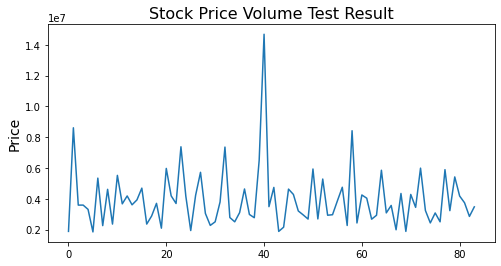

In [31]:

plt.figure(figsize=(8,4))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

Accuracy of model:

In [32]:

print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.0



Reading and Checking dataset of India News:

In [34]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [35]:
news_df.shape

(385223, 3)

In [36]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385223 entries, 0 to 385222
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   publish_date       385223 non-null  int64 
 1   headline_category  385223 non-null  object
 2   headline_text      385222 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.8+ MB


In [37]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [38]:
news_df['headline_text']

0         Status quo will not be disturbed at Ayodhya; s...
1                       Fissures in Hurriyat over Pak visit
2                     America's unwanted heading for India?
3                        For bigwigs; it is destination Goa
4                      Extra buses to clear tourist traffic
                                ...                        
385218          Democrats criticise ruling party in US Cong
385219              Jaiprakash appears before Khaira police
385220                                  Face of the tragedy
385221                MCD resumes demolition drive in Delhi
385222                                                  NaN
Name: headline_text, Length: 385223, dtype: object

In [39]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [40]:

news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic



Importing TextBlob:

In [42]:

from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

TypeError: ignored

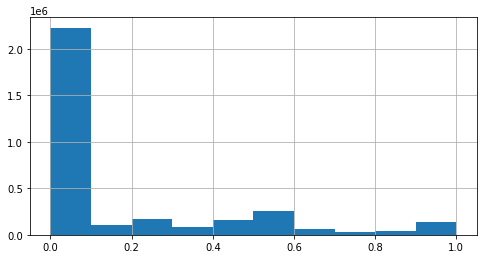

In [ ]:
plt.figure(figsize = (8,4))
news_df['Subjectivity'].hist()
plt.show()

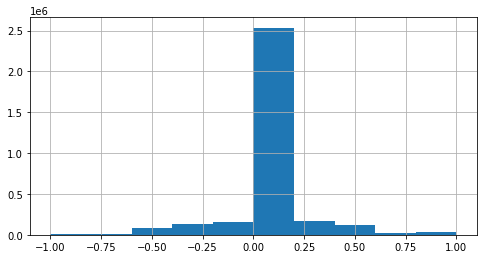

In [ ]:
plt.figure(figsize = (8,4))
news_df['Polarity'].hist()
plt.show()

SentimentIntensity Analyzer:

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 5.8MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342
